# Atividade Machine Learning
- Aluno: Gustavo Carvalho; 
- RA: 10175838

#### Importação de bibliotécas e carregamento dos Dados

In [ ]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv('Dataset Fraude.csv')

### Análise Exploratória de Dados (EDA)

#### Apresentação do cabeçalho do Dataset

In [25]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


#### Tipos de dados

In [26]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

#### Verficação e tratamento de valores faltantes

In [27]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

#### Mostra linhas com dados faltantes

In [28]:
df[df.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14,1,PAYMENT,4098.78,C1026483832,503264.0,4991.0,0,NaN,NaN,NaN,NaN


#### Removendo linhas com dados faltantes (Apenas 1 linha)
Optei pela remoção da linha pois se trata de 1 item em meio a 1048575, e a sua permanência ou atribuição de valor, pode interferir no resultado final.

In [29]:
df = df.dropna()

#### Verificação do tratamento

In [30]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [31]:
df[df.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


#### Remoção de colunas
As colunas "nameOrig" e "nameDest" foram removidas, pois poderiam servir como ruído e causar overfiting, por serem identificadores únicos.

In [32]:
columns_to_drop = ['nameOrig', 'nameDest']
df.drop(columns=columns_to_drop, inplace=True)

In [33]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


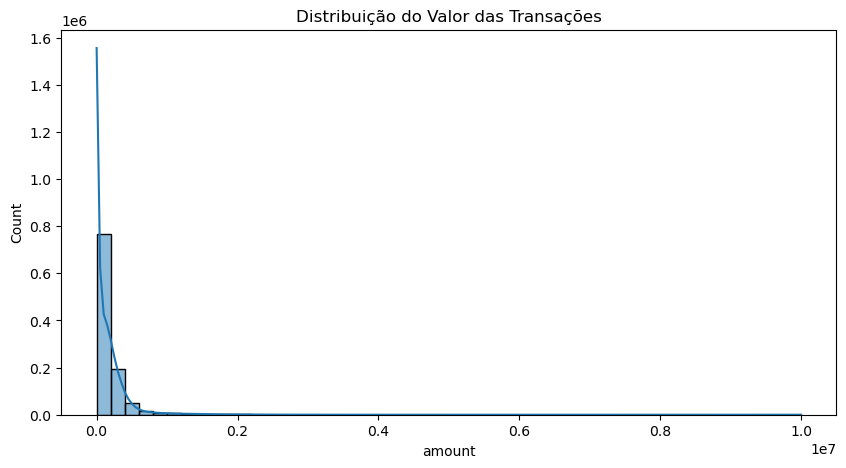

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df["amount"], bins=50, kde=True)
plt.title("Distribuição do Valor das Transações")
plt.show()

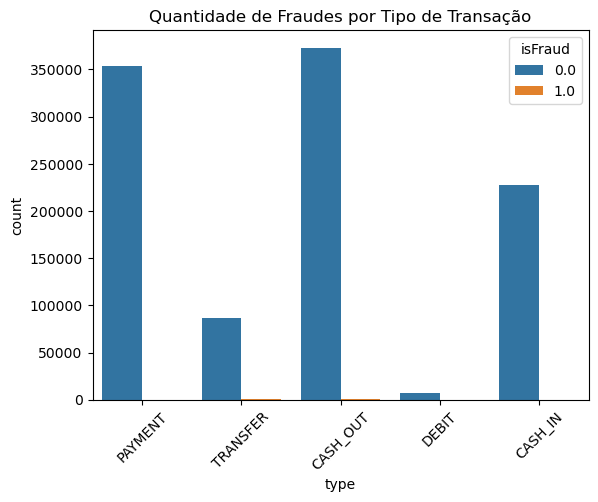

In [35]:
sns.countplot(x="type", hue="isFraud", data=df)
plt.title("Quantidade de Fraudes por Tipo de Transação")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Correlação entre Variáveis')

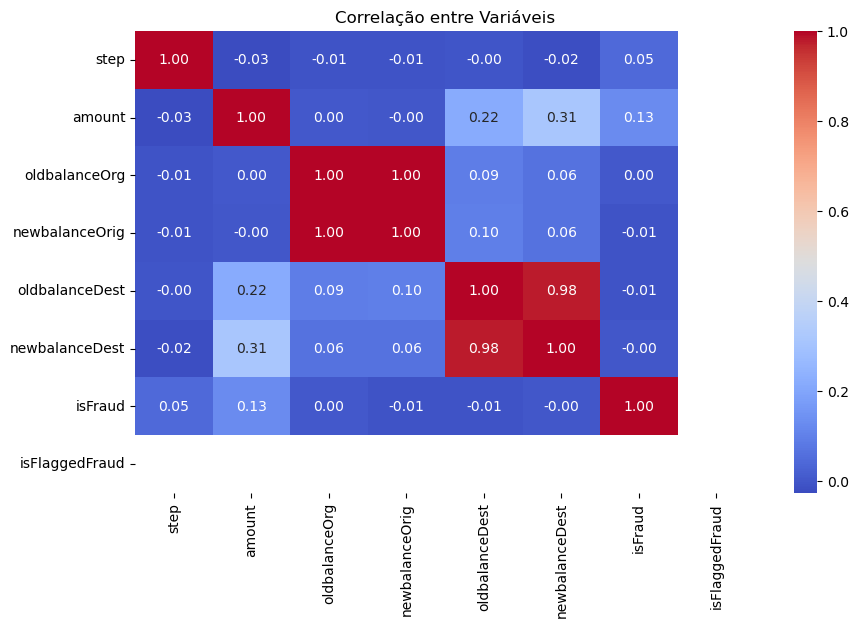

In [36]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")

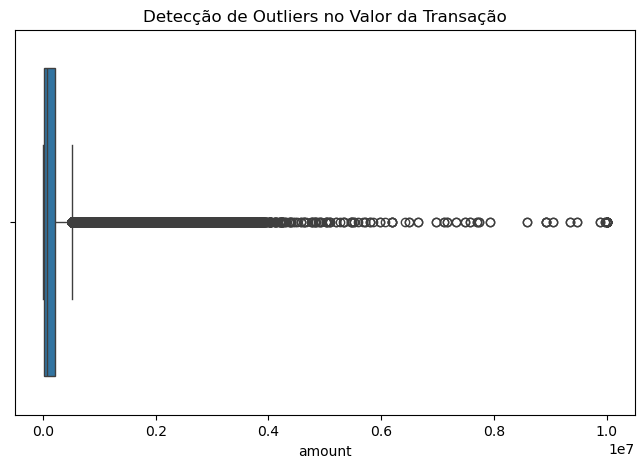

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["amount"])
plt.title("Detecção de Outliers no Valor da Transação")
plt.show()

## Preparação dos dados

#### Tipificação das colunas
Definir a classificação das colunas por tipos de dados (categóricas, numéricas e de alvo) para facilitar o tratamento específico para cada tipo, diferentes classes para categóricas, normalização para numéricos contínuos e target, para a variável que se quer como alvo de ação do modelo.

In [38]:
cat_features = ['type']
num_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'

####  Codificação de variável categórica
Converte variáveis de clasesses difernets strings em númericas asssociando um número para cada tipo diferente, para fazer com que determinados modelos de machine learning, possam trabalhar com os dados.

In [39]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

#### Normalização dos dados
Realização da normalização dos dados, para aumentar o desempenho de determinados modelos e evidta que números maiores, possam interferir nos processo de cálculos.

In [40]:
scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(df[num_features])

#### Junção dos dados
Junção dos dados anteriormente, separados e processados, em um único Data Frame, pega do original as colunas categoricas codificadas, e a variável isFraud, concatena as listas e troca o índdice de dados antigo.

In [41]:
df_processed = pd.concat([pd.DataFrame(numeric_scaled, columns=num_features), 
                          df[cat_features + [target]].reset_index(drop=True)], axis=1)

#### Dados após o processamento

In [42]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


# Treinamento e avaliação dos modelos.
Para o tipo x foram removidas as linhas com valor alvo como NaN.
Separação entre análise e treino.

In [47]:
X = df_processed.drop(columns=[target])
y = df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Criação de um dicionário com o nome como chave e o modelo como valor.

In [48]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

1. O loop inicia variávies que serão utilizadas para armazenar o melhor modelo e para armazenar a melhor acurácia.
2. O loop percorre o dicionário com os modelos analisa as métricas e apresenta seus resulados na tela.


Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314230
         1.0       0.88      0.06      0.12       343

    accuracy                           1.00    314573
   macro avg       0.94      0.53      0.56    314573
weighted avg       1.00      1.00      1.00    314573

Acurácia: 0.9990


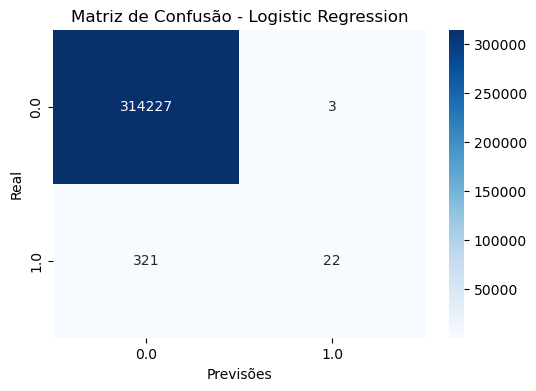


KNN:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314230
         1.0       0.86      0.64      0.73       343

    accuracy                           1.00    314573
   macro avg       0.93      0.82      0.87    314573
weighted avg       1.00      1.00      1.00    314573

Acurácia: 0.9995


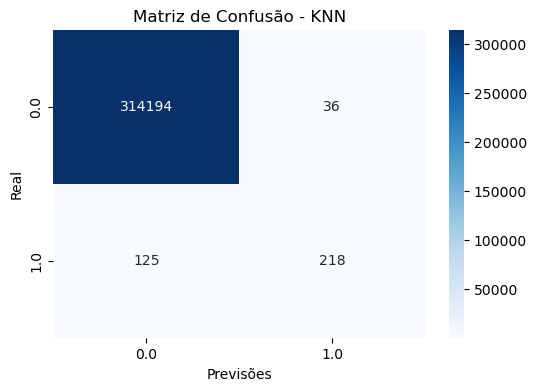


Decision Tree:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314230
         1.0       0.75      0.75      0.75       343

    accuracy                           1.00    314573
   macro avg       0.87      0.88      0.87    314573
weighted avg       1.00      1.00      1.00    314573

Acurácia: 0.9995


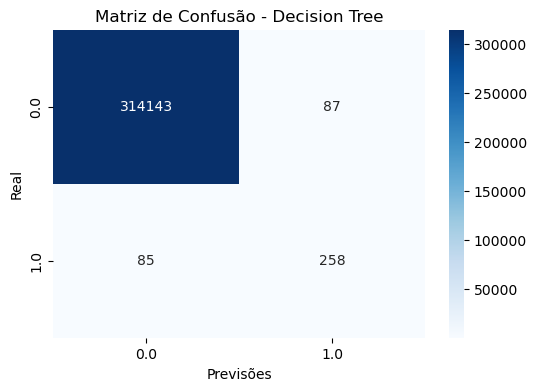


Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314230
         1.0       0.97      0.66      0.78       343

    accuracy                           1.00    314573
   macro avg       0.98      0.83      0.89    314573
weighted avg       1.00      1.00      1.00    314573

Acurácia: 0.9996


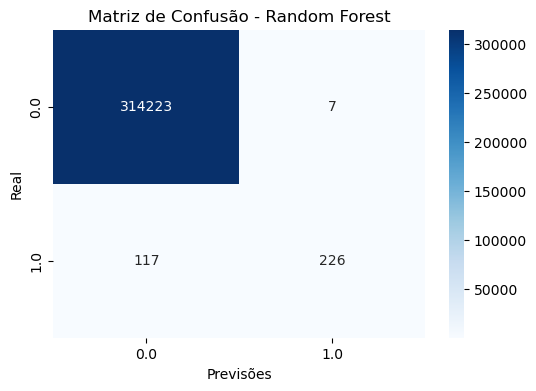


Gradient Boosting:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314230
         1.0       0.90      0.13      0.23       343

    accuracy                           1.00    314573
   macro avg       0.95      0.57      0.61    314573
weighted avg       1.00      1.00      1.00    314573

Acurácia: 0.9990


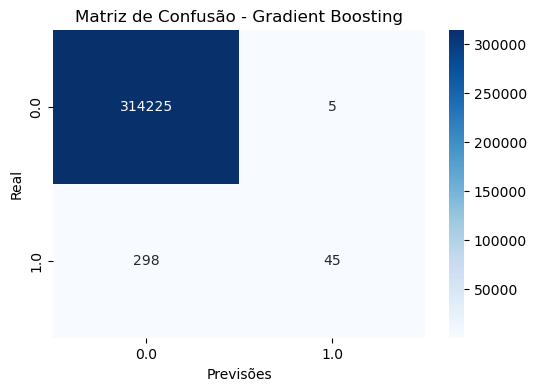

In [45]:
best_model = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\n{name}:\n', classification_report(y_test, y_pred))
    print(f'Acurácia: {acc:.4f}')
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Previsões')
    plt.ylabel('Real')
    plt.show()
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

Mostra qual é o melhor modelo e qual a sua acurácia.

In [46]:
print(f'O modelo com melhor desempenho foi: {best_model} com acurácia de {best_accuracy:.4f}')

O modlo com melhor desempenho foi: Random Forest com acurácia de 0.9996
